C:\Users\knh30\AppData\Local\Temp\ipykernel_12576\949785052.py:47: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  src = im.imread('Cat.jpg')


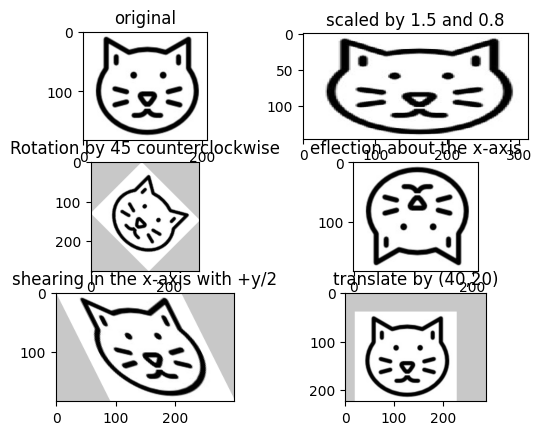

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as im

def linear_transformation(src, a):
    M, N, _ =  src.shape
    corners = np.array([[0,0,N-1,N-1], [0,M-1,0,M-1]])
    new_points = a.dot(corners).astype(int)
    
    xcoord = new_points[0,:]
    ycoord = new_points[1,:]
    minx = np.amin(xcoord)
    maxx = np.amax(xcoord)
    miny = np.amin(ycoord)
    maxy = np.amax(ycoord)
    
    newN = maxx-minx+1
    newM = maxy-miny+1
    dest = np.full((newM, newN, 3), 200)
    y = miny
    for i in range(newM):
        x = minx
        for j in range(newN):
            pts = np.array([[x],[y]])
            newpts = np.linalg.inv(a).dot(pts).round().astype(int)
            if (newpts[0] >= 0 and newpts[0] < N and newpts[1] >= 0 and newpts[1] < M):
                dest[i,j,:] = src[newpts[1],newpts[0],:]
            x = x + 1
        y = y + 1
    return dest

def translate(src, d):
    M, N, _ = src.shape
    steps = np.absolute(d)
    
    newM = M + 2*steps[1]
    newN = N + 2*steps[0]
    dest = np.full((newM, newN, 3), 200)
    for i in range(newM):
        for j in range(newN):
            yp = i-d[0]
            xp = j-d[1]
            if xp >= 0 and xp < N and yp >= 0 and yp < M:
                dest[i,j,:] = src[yp, xp, :]
    return dest

src = im.imread('Cat.jpg')
plt.subplot(3,2,1)
plt.title('original')
plt.imshow(src)

a = np.array([[1.5, 0], [0, 0.8]])
dst = linear_transformation(src, a)
plt.subplot(3,2,2)
plt.title('scaled by 1.5 and 0.8')
plt.imshow(dst)

alpha = np.pi/4
a = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
dst = linear_transformation(src, a)
plt.subplot(3,2,3)
plt.title('Rotation by 45 counterclockwise')
plt.imshow(dst)

a = np.array([[1,0], [0,-1]])
dst = linear_transformation(src, a)
plt.subplot(3,2,4)
plt.title('eflection about the x-axis')
plt.imshow(dst)

a = np.array([[1,.5], [0,1]])
dst = linear_transformation(src, a)
plt.subplot(3,2,5)
plt.title('shearing in the x-axis with +y/2')
plt.imshow(dst)

dst = translate(src, [40,20])
plt.subplot(3,2,6)
plt.title('translate by (40,20)')
plt.imshow(dst)
plt.show()

In [4]:
import numpy as np

def pprint(msg, A):
    print("---", msg, "---")
    (n,m) = A.shape
    for i in range(0, n):
        line = ""
        for j in range(0, m):
            line += "{0:.2f}".format(A[i,j]) + '\t'
        print(line)
    print("")
    
A = np.eye(4)
pprint("A", A)
print("rank(A) = ", np.linalg.matrix_rank(A))

B = np.zeros((3,3))
pprint("B",B)
print("rank(B) = ", np.linalg.matrix_rank(B))

C = np.array([[2,5,-3,-4,8],
              [4,7,-4,-3,9],
              [6,9,-5,2,4],
              [0,-9,6,5,-6]])
pprint("C",C)
print("rank(C) = ", np.linalg.matrix_rank(C))

CT = np.transpose(C)
pprint("C^T", CT)
print("rank(C^T) = ", np.linalg.matrix_rank(CT))

--- A ---
1.00	0.00	0.00	0.00	
0.00	1.00	0.00	0.00	
0.00	0.00	1.00	0.00	
0.00	0.00	0.00	1.00	

rank(A) =  4
--- B ---
0.00	0.00	0.00	
0.00	0.00	0.00	
0.00	0.00	0.00	

rank(B) =  0
--- C ---
2.00	5.00	-3.00	-4.00	8.00	
4.00	7.00	-4.00	-3.00	9.00	
6.00	9.00	-5.00	2.00	4.00	
0.00	-9.00	6.00	5.00	-6.00	

rank(C) =  3
--- C^T ---
2.00	4.00	6.00	0.00	
5.00	7.00	9.00	-9.00	
-3.00	-4.00	-5.00	6.00	
-4.00	-3.00	2.00	5.00	
8.00	9.00	4.00	-6.00	

rank(C^T) =  3
